In [2]:
import pickle

data=pickle.load(open('data.pickle','rb'))
target=pickle.load(open('target.pickle','rb'))

In [3]:
#from matplotlib import pyplot as plt

#plt.imshow(data[0])
#plt.show()

print(target[0])

[0 1 0]


In [4]:
print(data.shape)

data=data/255.0

(3131, 50, 50, 1)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [9]:
model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(3))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
train_history=model.fit(data, target, epochs=10, validation_split=0.3)

Instructions for updating:
Use tf.cast instead.
Train on 2191 samples, validate on 940 samples
Epoch 1/10
2191/2191 [==============================] - 125s 57ms/step - loss: 0.4505 - acc: 0.7862 - val_loss: 0.2677 - val_acc: 0.9021
Epoch 2/10
2191/2191 [==============================] - 128s 58ms/step - loss: 0.1959 - acc: 0.9296 - val_loss: 0.1632 - val_acc: 0.9418
Epoch 3/10
2191/2191 [==============================] - 147s 67ms/step - loss: 0.1297 - acc: 0.9547 - val_loss: 0.1095 - val_acc: 0.9596
Epoch 4/10
2191/2191 [==============================] - 138s 63ms/step - loss: 0.0903 - acc: 0.9694 - val_loss: 0.1017 - val_acc: 0.9667
Epoch 5/10
2191/2191 [==============================] - 123s 56ms/step - loss: 0.0619 - acc: 0.9790 - val_loss: 0.1007 - val_acc: 0.9660
Epoch 6/10
2191/2191 [==============================] - 125s 57ms/step - loss: 0.0630 - acc: 0.9785 - val_loss: 0.0951 - val_acc: 0.9691
Epoch 7/10
2191/2191 [==============================] - 129s 59ms/step - loss: 0.03

In [13]:
model.save_weights('Blocks_V2.h5')

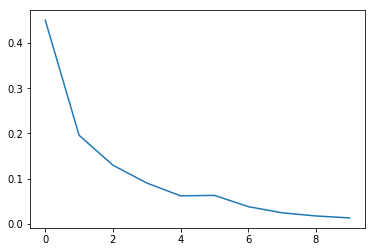

In [14]:
from matplotlib import pyplot as plt

plt.plot(train_history.history['loss'])
plt.show()

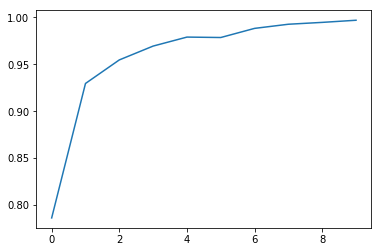

In [17]:
plt.plot(train_history.history['acc'])
plt.show()